In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load the data

In [3]:
df=pd.read_csv('USCarrier_Traffic_20200607110541.csv',index_col=['Period'],parse_dates=True)

In [4]:
df.head(5)

,Total
Period,
2000-01-01,49045412
2000-02-01,49306303
2000-03-01,60443541
2000-04-01,58286680
2000-05-01,60533783


## Visualizing The Data Using  Line chart 
* by observing the line chart we can say that there is seasonality present in the data set

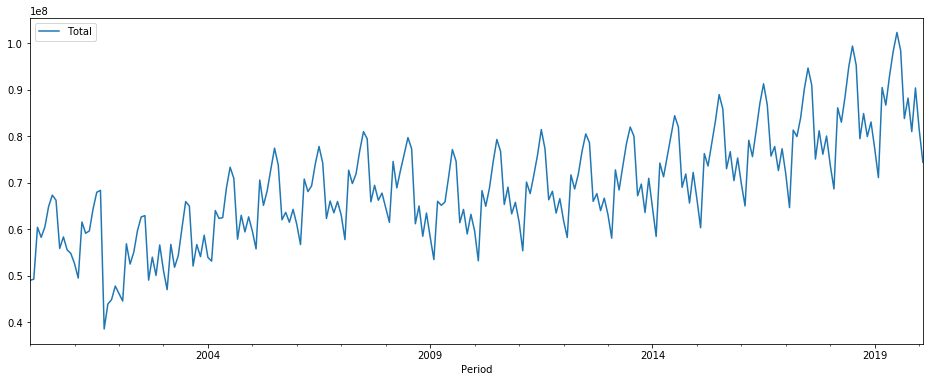

In [5]:
df.plot(kind="line",figsize=(16,6))

## Check for Stationary

                                      ## Testing  For Stationary
                                      ## Using ADF Test
                                      ## H0: series is non-stationary
                                      ## H1: series is stationary

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()
    #moving_avg = ts_log.rolling(12).mean()
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

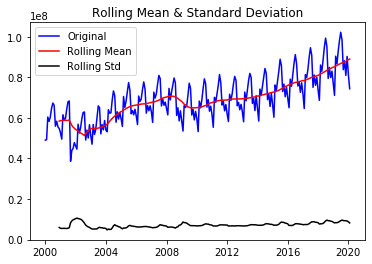

Results of Dickey-Fuller Test:
Test Statistic                   0.223216
p-value                          0.973534
#Lags Used                      13.000000
Number of Observations Used    228.000000
Critical Value (1%)             -3.459361
Critical Value (5%)             -2.874302
Critical Value (10%)            -2.573571
dtype: float64


In [8]:
test_stationarity(df)

                         ## so by looking the p-value we can say that our data is non - stationary

## Diffrencing

In [9]:
df2=df.diff(12)
df2=df2.dropna()

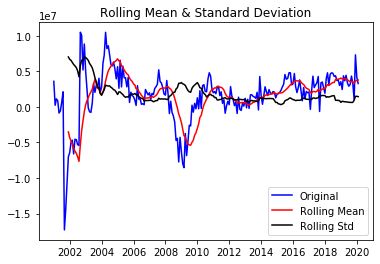

Results of Dickey-Fuller Test:
Test Statistic                  -2.923398
p-value                          0.042694
#Lags Used                      13.000000
Number of Observations Used    216.000000
Critical Value (1%)             -3.460992
Critical Value (5%)             -2.875016
Critical Value (10%)            -2.573952
dtype: float64


In [10]:
test_stationarity(df2)

                            ## by looking the p value we can say that data is stationary

                                       ## Split the data into train and test

In [11]:
train=df[0:190] 
test=df[190:]

In [12]:
test.shape

(52, 1)

                                        ## Moving Average

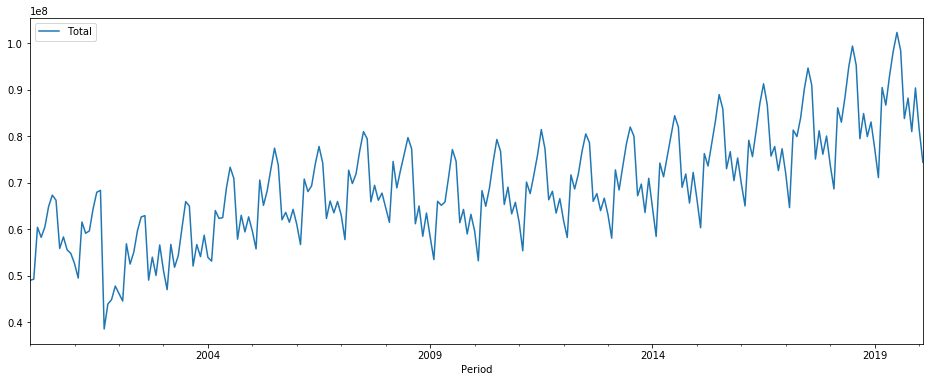

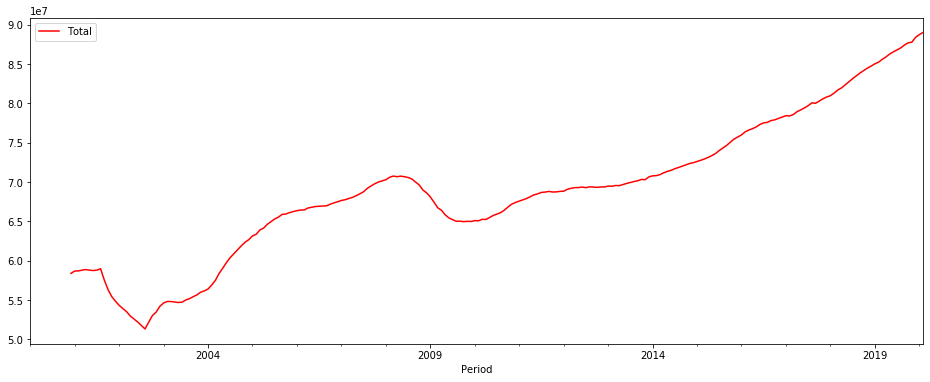

In [13]:
moving_average =df.rolling(12).mean()
df.plot(kind="line",figsize=(16,6))
moving_average.plot(kind="line",figsize=(16,6),color='red')
plt.show()

                                   ## Decomposition
                                   ## we use additive method because constant varianec over time

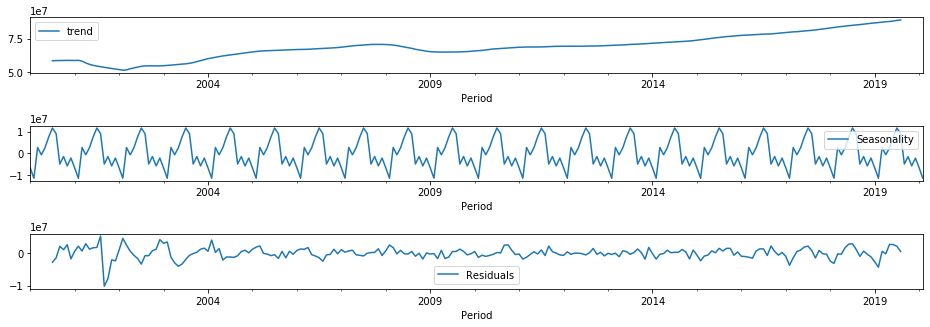

In [14]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(df,model='add', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

df.plot(kind="line",figsize=(13,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(13,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(13,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(13,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Simple Exponential Smoothing


             ## Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series                                    forecasting method for univariate data without a trend or seasonality.
                                            ## Alpha: Smoothing factor for the level.

In [15]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [16]:
train = train.astype('double')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(40)
ses.summary()

C:\Users\abc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,190
Model:,SimpleExpSmoothing,SSE,8119091233935832.000
Optimized:,True,AIC,5967.334
Trend:,None,BIC,5973.828
Seasonal:,None,AICC,5967.551
Seasonal Periods:,None,Date:,"Wed, 10 Jun 2020"
Box-Cox:,False,Time:,15:09:07
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7084602,alpha,True
initial_level,4.9045e+07,l.0,True


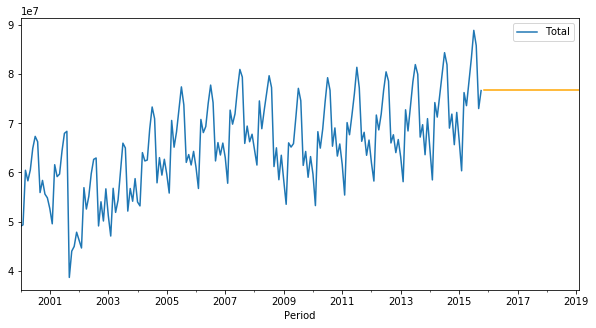

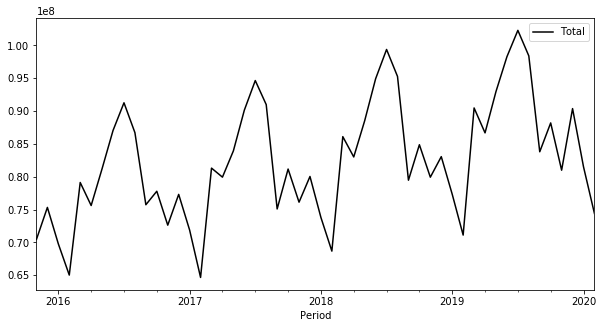

In [17]:
train.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

                                       ## ExponentialSmoothing

In [18]:
s = ExponentialSmoothing(train , trend='add').fit()
s.summary()

C:\Users\abc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,190
Model:,ExponentialSmoothing,SSE,8121051148222068.000
Optimized:,True,AIC,5971.380
Trend:,Additive,BIC,5984.368
Seasonal:,None,AICC,5971.839
Seasonal Periods:,None,Date:,"Wed, 10 Jun 2020"
Box-Cox:,False,Time:,15:09:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6842105,alpha,True
smoothing_slope,0.0001,beta,True


In [19]:
fore = s.forecast(40)

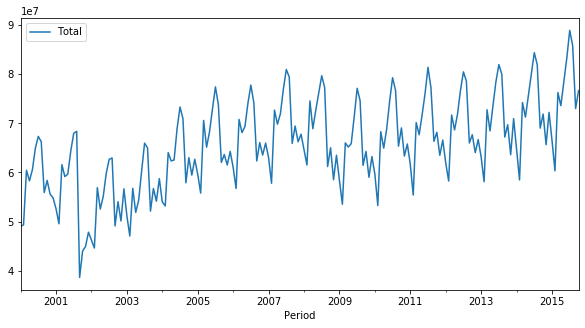

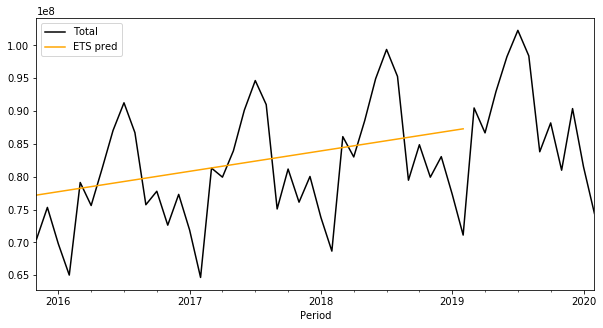

In [20]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
fore.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

                                     ## ACF and PACF plots:                        

In [21]:
from statsmodels.tsa.stattools import acf, pacf

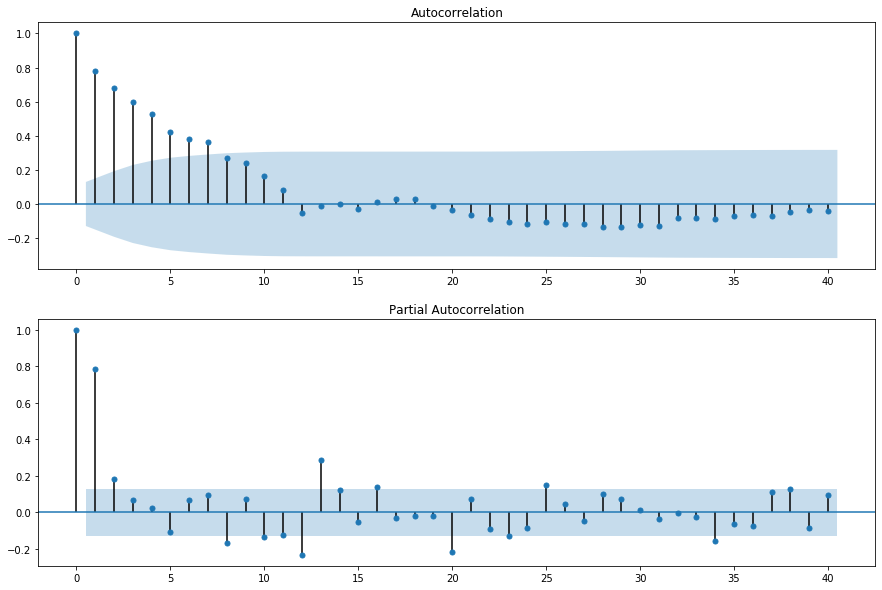

In [22]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(df2, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(df2, ax=pyplot.gca(),lags=40)
pyplot.show()

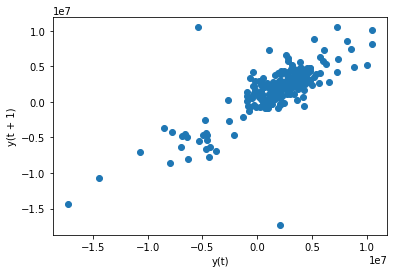

In [23]:
from pandas.plotting import lag_plot
lag_plot(df2)
pyplot.show()

## ARIMA MODEL 


In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [25]:
model = ARIMA(train, order=(2,2,2))
model_fit=model.fit(disp=True)
print(model_fit.summary())

C:\Users\abc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.Total   No. Observations:                  188
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -3211.936
Method:                       css-mle   S.D. of innovations        6255610.401
Date:                Wed, 10 Jun 2020   AIC                           6435.873
Time:                        15:09:10   BIC                           6455.291
Sample:                    03-01-2000   HQIC                          6443.740
                         - 10-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2245.9708   6469.069     -0.347      0.728   -1.49e+04    1.04e+04
ar.L1.D2.Total    -1.0804      0.073    -14.732      0.000      -1.224      -0.937
ar.L2.D2.Total    -0.3635      0.068

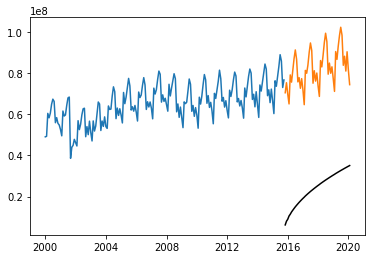

In [26]:
forecast = model_fit.forecast(steps=52)[1]
forecast = pd.DataFrame(forecast,index = test.index,columns=['Total'])
#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

## SARIMA MODEL

In [27]:
import statsmodels.api as sm

In [28]:
model1 = sm.tsa.SARIMAX(train, order=(1,1,0), seasonal_order=(0,1,2,12))

C:\Users\abc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\abc\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [29]:
model_fit=model1.fit(disp=True)
print(model_fit.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                   Total   No. Observations:                  190
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood               -2857.327
Date:                                 Wed, 10 Jun 2020   AIC                           5722.655
Time:                                         15:09:11   BIC                           5735.359
Sample:                                     01-01-2000   HQIC                          5727.807
                                          - 10-01-2015                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0579      0.025     -2.346      0.019      -0.106      -0

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_true=test,y_pred=forecast))

58520199.036659494


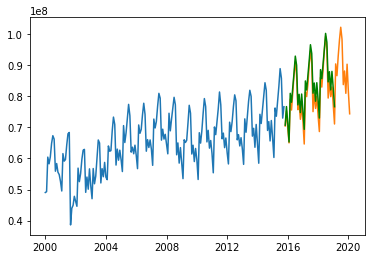

In [31]:
forecast = model_fit.forecast(steps=40)
#print(forecaast
#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='green')
plt.show()

## Auto ARIMA MODEL

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=5729.110, BIC=5744.991, Time=0.971 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=5728.576, BIC=5734.928, Time=0.022 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=5728.184, BIC=5740.888, Time=0.267 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=5727.500, BIC=5740.205, Time=0.387 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=5727.032, BIC=5730.208, Time=0.020 seconds
Fit ARIMA(0,1,0)x(1,1,0,12) [intercept=True]; AIC=5726.843, BIC=5736.371, Time=0.945 seconds
Fit ARIMA(0,1,0)x(2,1,0,12) [intercept=True]; AIC=5727.338, BIC=5740.042, Time=0.527 seconds
Fit ARIMA(0,1,0)x(1,1,1,12) [intercept=True]; AIC=5719.660, BIC=5732.364, Time=0.612 seconds
Fit ARIMA(0,1,0)x(0,1,1,12) [intercept=True]; AIC=5726.371, BIC=5735.899, Time=0.301 seconds
Fit ARIMA(0,1,0)x(2,1,1,12) [intercept=True]; AIC=5720.945, BIC=5736.826, Time=1.787 seconds
Fit ARIMA(0,1,0)x(1,1,2,12

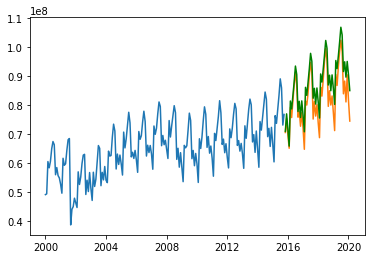

In [32]:
from pmdarima import auto_arima
model2 = auto_arima(train, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, 
                   seasonal=True,d=1, D=1, trace=True,error_action='ignore',
                   suppress_warnings=True,stepwise=True)
model2.fit(train)
forecast = model2.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])
#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='green')
plt.show()

In [33]:
print(model2.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  190
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -2855.830
Date:                              Wed, 10 Jun 2020   AIC                           5719.660
Time:                                      15:09:26   BIC                           5732.364
Sample:                                           0   HQIC                          5724.812
                                              - 190                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6786.8531   7.06e+04      0.096      0.923   -1.32e+05    1.45e+05
ar.S.L12       0.58

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_true=test,y_pred=forecast))

4568992.912040741
